<a href="https://colab.research.google.com/github/SShresth7272/Python-Code/blob/main/Machine_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Multiclass Classification


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score, mean_squared_error
)
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier




from sklearn.svm import SVC




import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [1]:
from google.colab import files
uploaded = files.upload()

Saving df_sel  (3).csv to df_sel  (3).csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['df_sel  (3).csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4009 non-null   int64  
 1   encoded_brand       4009 non-null   int64  
 2   encoded_model       4009 non-null   int64  
 3   model_year          4009 non-null   int64  
 4   encoded_model_year  4009 non-null   int64  
 5   log10_milage        4009 non-null   float64
 6   encoded_fuel_type   4009 non-null   float64
 7   HP                  4009 non-null   float64
 8   Liters              4009 non-null   float64
 9   Cylinder            4009 non-null   float64
 10  Straight            4009 non-null   float64
 11  Flat                4009 non-null   float64
 12  gear_type           4009 non-null   int64  
 13  transmission_type   4009 non-null   int64  
 14  speed_value         4009 non-null   float64
 15  encoded_ext_col     4009 non-null   int64  
 16  encode

In [5]:
df.head(10)

,Unnamed: 0,encoded_brand,encoded_model,model_year,encoded_model_year,log10_milage,encoded_fuel_type,HP,Liters,Cylinder,Straight,Flat,gear_type,transmission_type,speed_value,encoded_ext_col,encoded_int_col,encoded_accident,log10_price
0,0,33,265,2013,21,4.707570,2.0,300.0,3.7,1.0,0.0,0.0,1,0,6.0,77,40,1.0,4.012837
1,1,12,1053,2021,29,4.540855,3.0,310.0,3.8,0.0,0.0,0.0,1,0,8.0,135,10,1.0,4.579841
2,2,29,1514,2022,30,4.349705,3.0,310.0,3.5,0.0,0.0,0.0,1,0,6.0,69,40,0.0,4.737177
3,3,16,465,2015,23,4.948902,6.0,354.0,3.5,1.0,0.0,0.0,1,0,7.0,77,40,0.0,4.190332
4,4,35,1130,2021,29,3.992774,3.0,310.0,2.0,0.0,0.0,0.0,1,0,8.0,110,40,0.0,4.544056
5,5,20,431,2016,24,5.134805,3.0,310.0,3.5,0.0,0.0,0.0,0,0,6.0,35,2,0.0,4.170203
6,6,35,861,2017,25,4.924279,3.0,292.0,2.0,1.0,0.0,0.0,1,0,6.0,69,40,0.0,4.491362
7,7,34,135,2001,8,5.383815,3.0,282.0,4.4,1.0,0.0,0.0,1,0,6.0,122,16,0.0,3.863323
8,8,29,1305,2021,29,4.369883,3.0,311.0,3.5,1.0,0.0,0.0,1,0,6.0,77,40,0.0,4.622494
9,9,43,1641,2020,28,4.531479,3.0,534.0,3.5,0.0,0.0,0.0,1,0,6.0,77,40,0.0,4.844788


In [5]:
from google.colab import files
uploaded = files.upload()

Saving df_sel  (3).csv to df_sel  (3).csv


In [7]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['df_sel  (3).csv']))

In [8]:
df.head()

,Unnamed: 0,encoded_brand,encoded_model,model_year,encoded_model_year,log10_milage,encoded_fuel_type,HP,Liters,Cylinder,Straight,Flat,gear_type,transmission_type,speed_value,encoded_ext_col,encoded_int_col,encoded_accident,log10_price
0,0,33,265,2013,21,4.707570,2.0,300.0,3.7,1.0,0.0,0.0,1,0,6.0,77,40,1.0,4.012837
1,1,12,1053,2021,29,4.540855,3.0,310.0,3.8,0.0,0.0,0.0,1,0,8.0,135,10,1.0,4.579841
2,2,29,1514,2022,30,4.349705,3.0,310.0,3.5,0.0,0.0,0.0,1,0,6.0,69,40,0.0,4.737177
3,3,16,465,2015,23,4.948902,6.0,354.0,3.5,1.0,0.0,0.0,1,0,7.0,77,40,0.0,4.190332
4,4,35,1130,2021,29,3.992774,3.0,310.0,2.0,0.0,0.0,0.0,1,0,8.0,110,40,0.0,4.544056


In [13]:
# Assuming df_sel is your DataFrame with selected features
X = df.drop("log10_price", axis=1).values  # Convert to NumPy array
y = df["log10_price"].values.reshape(-1, 1)  # Convert to column vector


In [14]:
# Split the data: 70% Training, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [15]:
def model(X, Y, learning_rate, iteration):
  m=Y.size
  X = np.c_[np.ones(m), X] # add bias term
  theta = np.zeros((X.shape[1],1)) # Initialize theta
  cost_list = []

  for i in range(iteration):
    y_pred = np.dot(X,theta)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - Y)) # MSE Cost
    d_theta  = (1/ m) * np.dot(X.T, y_pred - Y) # Gradient equation
    theta = theta - learning_rate * d_theta
    cost_list.append(cost)
  return theta, cost_list

In [16]:

# Convert data into NumPy arrays for matrix operations
X_train, y_train = X_train, y_train.reshape(-1, 1)
X_val, y_val = X_val, y_val.reshape(-1, 1)
X_test, y_test = X_test, y_test.reshape(-1, 1)


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2806, 18)
(2806, 1)
(602, 18)
(602, 1)


In [18]:
# Training the model
learning_rate = 0.0000001  # Adjusted for stability
iterations = 1000
theta, cost_list = model(X_train, y_train, learning_rate, iterations)


In [19]:
# Making predictions
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

y_train_pred = np.dot(X_train_bias, theta)
y_val_pred = np.dot(X_val_bias, theta)
y_test_pred = np.dot(X_test_bias, theta)

In [20]:
print(X_train_bias.shape)

(2806, 19)


In [23]:
 #Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse)
print(val_mse)
print(test_mse)

0.020461045504403086
0.02176698387789752
0.03663507886883579


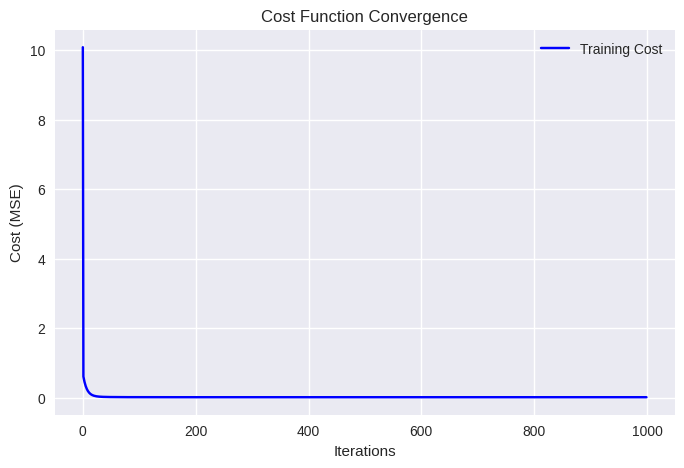

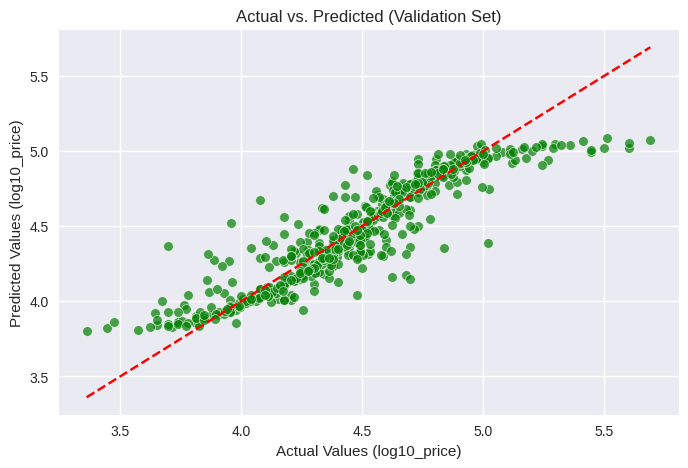

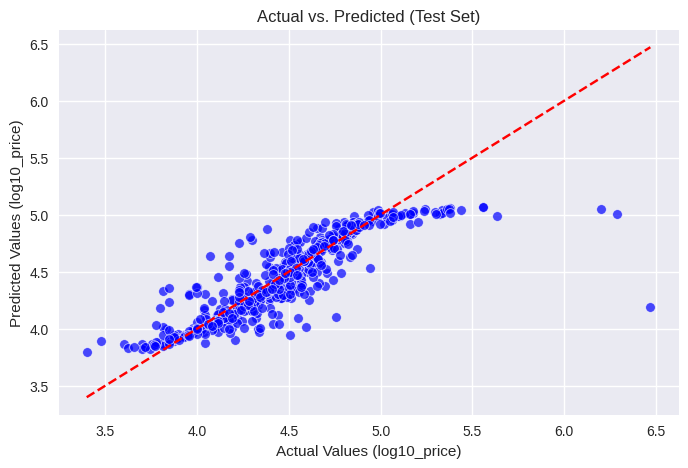

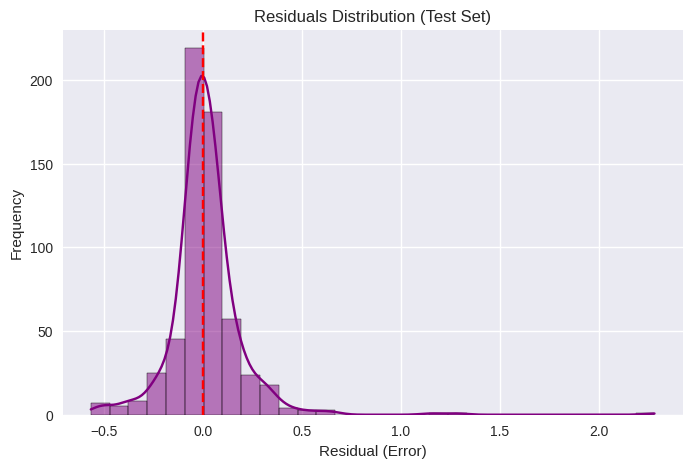

Final Model Parameters (Theta): [ 9.23131686e-07  6.44102371e-07  3.49351646e-05  6.12105440e-04
  1.87333163e-03  3.87603529e-05  2.12900266e-06  3.18070226e-06
  1.82798579e-04  2.03837084e-06  8.41266915e-08 -2.59758339e-08
  1.01671937e-07  8.60591493e-07  4.99705557e-07  7.53156654e-06
  1.65063166e-04  8.70210086e-05 -2.76687017e-07]
Training MSE: 0.0205
Validation MSE: 0.0218
Test MSE: 0.0366


In [24]:




# --- VISUALIZATIONS ---

# 1. Plot Cost Function Convergence
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_list, label="Training Cost", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# 2. Scatter Plot: Actual vs. Predicted (Validation Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val.ravel(), y=y_val_pred.ravel(), color='green', alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Validation Set)")
plt.show()

# 3. Scatter Plot: Actual vs. Predicted (Test Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.ravel(), y=y_test_pred.ravel(), color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()

# 4. Residuals Histogram (Error Analysis)
residuals = y_test.ravel() - y_test_pred.ravel()
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Test Set)")
plt.show()

# --- PRINT RESULTS ---
print(f"Final Model Parameters (Theta): {theta.ravel()}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


